In [65]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [66]:
# loading image

# filepath = './traffic/london1.jpg'
# filepath = './traffic/dubai2.jpg'
# filepath = './traffic/chess_board.png'
# filepath = './gesture/gesture1.jpg'
# filepath = './manufacture/manufacture1.jpg'
filepath = './face/face2.jpg'
# filepath = './chessboard/msc_chessboard.jpg'

img = cv.imread(filepath)

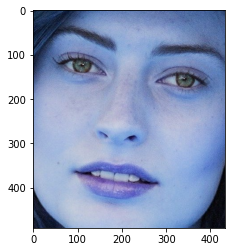

In [67]:
# original

plt.imshow(img)
plt.show()

In [68]:
# grayscale

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = np.float32(gray)

In [69]:
# corner detection
#    parameters

blockSize = 2
kSize = 3
k = 0.05

dst = cv.cornerHarris(gray, blockSize, kSize, k)

In [70]:
# dilation to make corners visible

dilation_k = int(img.shape[0] * 0.005)    # ksize proportional to the dimensions of the image
# dilation_k = int(img.shape[0] * 0.01)    # ksize proportional to the dimensions of the image
dilation_element = cv.getStructuringElement(cv.MORPH_RECT, (dilation_k, dilation_k))

dst = cv.dilate(dst, dilation_element)

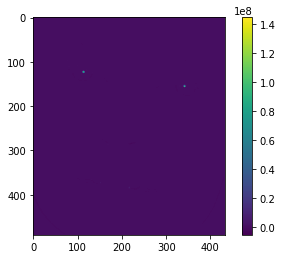

In [71]:
# plot of dst image after dilation (direct result of the corner detection algorithm)

# figsize_k = 0.000000001
# figsize = (int(k * img.shape[1]), int(k * img.shape[0]))

fig = plt.imshow(dst)
plt.colorbar(fig)
plt.show()

In [72]:
# only showing corners in red

corner_threshold = 0.0001

corners = np.ones((img.shape[0], img.shape[1], 3), dtype = np.uint8) * 255
corners[dst>corner_threshold*dst.max()]=[255, 0, 0]

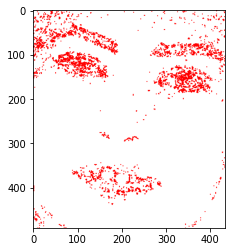

In [73]:
plt.imshow(corners)

In [74]:
# new image to overlay corners

imgnew = img.copy()

In [75]:
imgnew[dst>corner_threshold*dst.max()]=[0, 0, 255]

In [76]:
# to save:

path_save = '.' + filepath.split('.')[1] + '_result.jpg'

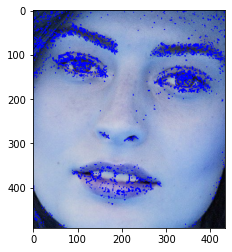

In [77]:
# fig2 = plt.figure()
plt.imshow(imgnew)
plt.show()
# fig2.savefig(path_save, dpi = 500)

In [78]:
cv.imwrite(path_save, imgnew)

True